In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head(10)

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


Text(0, 0.5, 'Chemical concentration')

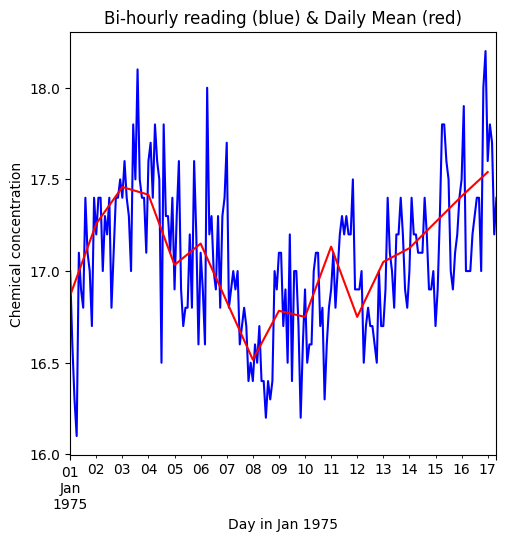

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('datasets/chemical-concentration-readings.csv')

datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid

daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Day in Jan 1975')
ax.set_ylabel('Chemical concentration')
#51